#### ACTIVITY 2 (PART 2 OF 2) – PROPERTIES AND APPLICATIONS OF THE 2D FOURIER TRANSFORM

Andeo, Lovely\
2020-05405\
FX-2

**Activity 2.2.1 Rotation Property of the FT**

1. Create a 2D sinusoid using MATLAB in the X direction (similar to a corrugated roof).
2. Rotate the sinusoid and take its FFT (be sure to FFTshift!). Discuss what happens to its FT.
3. Create a pattern which is a combination of sinusoids in X and Y and observe its FT. For example, the code below is a product of two corrugated roofs, one running in the X-direction, the other in Y.
4. Add several rotated sinusoids of different frequencies to the pattern in 3 and observe the FT.

**Output**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps, ImageChops, ImageMath
from skimage import io
from scipy.signal import convolve2d
from skimage.io import imread
from scipy.ndimage import rotate
from scipy.fft import fft2, ifft2, fftshift

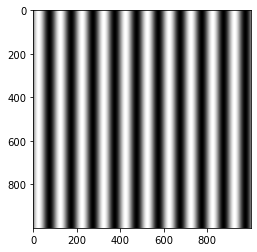

In [2]:
# Defining the parameters
amp1 = 1
wavelength1 = 10
freq1 = 2 * np.pi / wavelength1

# Creating the sinusoid
x = np.linspace(0, 100, 1000)
y = amp1 * np.sin(freq1 * x)
z = np.tile(y, (1000, 1))

# Plotting the 2D sinusoid
plt.imshow(z, cmap = 'gray')


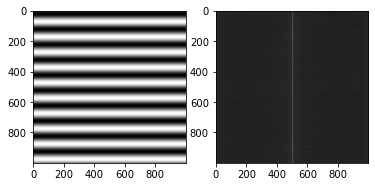

In [3]:
# Rotating the sinusoid by 90 degrees
z_rotated = rotate(z, angle=90, reshape=False)

# Taking its FFT
z_fft = fftshift(fft2(z_rotated))

# Plotting the rotated sinusoid and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(z_rotated, cmap='gray')
axs[1].imshow(np.log(np.abs(z_fft)), cmap='gray')
plt.show()


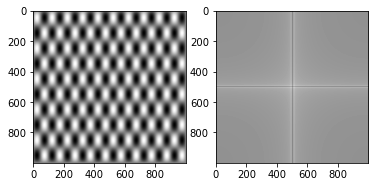

In [4]:
amp2 = 1
wavelength2 = 20
freq2 = 2 * np.pi / wavelength2

# Generating the arrays of X-axis and Y-axis values
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

# Creating 1D sinusoids in x and y
sin_x = amp1 * np.sin(freq1 * x)
sin_y = amp2 * np.sin(freq2 * y)

# Taking the other product to make it 2D
pattern = np.outer(sin_y, sin_x)

# Taking the FFT and shifting the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Ploting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
plt.show()


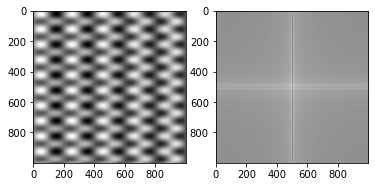

In [5]:
# Adding severak rotated sinusoid of diff frequencies
amp3 = 0.5
wavelength3 = 30
freq3 = 2 * np.pi / wavelength3
sin1 = amp3 * np.sin(freq3 * (x * np.cos(np.pi/4) + y * np.sin(np.pi/4)))

# Combining the sinusoids to create the new pattern
pattern = sin_x[:, np.newaxis] * sin_y[np.newaxis, :] + sin1

# Taking the FFT of the pattern and shift the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Plotting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
plt.show()


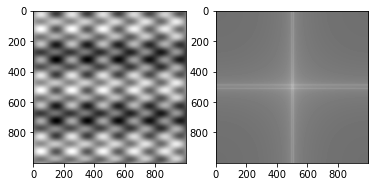

In [6]:
# Adding one more rotated sinusoid of diff frequencies
amp4 = 0.8
wavelength4 = 40
freq4 = 2 * np.pi / wavelength4
sin2 = amp4 * np.sin(freq4 * x)

# Combining the sinusoids to create the new pattern
pattern = sin_x[:, np.newaxis] * sin_y[np.newaxis, :] + sin1 + sin2[:, np.newaxis]

# Taking the FFT of the pattern and shift the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Plotting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
plt.show()


**Activity 2.2.2 Application: Canvas Weave Modeling and Removal**

1. Open the image 185-8526.jpg and convert into a grayscale image. To enhance the detec- tion of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images. The image is from a painting by Dr. Vincent Daria.
2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.
3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks . Take the inverse FT of the filtered FT and overlay the filtered R,G,B images . Did the canvas weave vanish enough that the paint and brushstrokes remain?
4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Ob- serve the generated modulus image. Is it close to the appearance of the canvas weave?


**Extra Challenge 1**
Look for a material that has repeating texture and on top of it is a print, for example, ecobags with super- market logos, t-shirt with a brand, etc. Capture an image of the material with print or logo and filter out the texture. The resulting image should just be the print or logo.

**Extra Challenge 2**
Kaketsugi is the Japanese are of invisible mending. To repair a hole in a garment, a piece of fabric from the same garment is cut and patched onto the hole by painstakingly weaving the fabric into the hole fol- lowing the weave pattern of the cloth. Watch this youtube video to appreciate the art. Practitioners study the weaving pattern of different fabrics to inform the excution of their craft. Take a close-up image of a piece of fabric and take its FT. Filter out everything except the peaks corresponding to the weave pat- terns. Take the inverse FT of the filtered image. Does it look like an enhanced version of the weave pat- tern?

Convolving the two images (aperture with 10% of the array width)

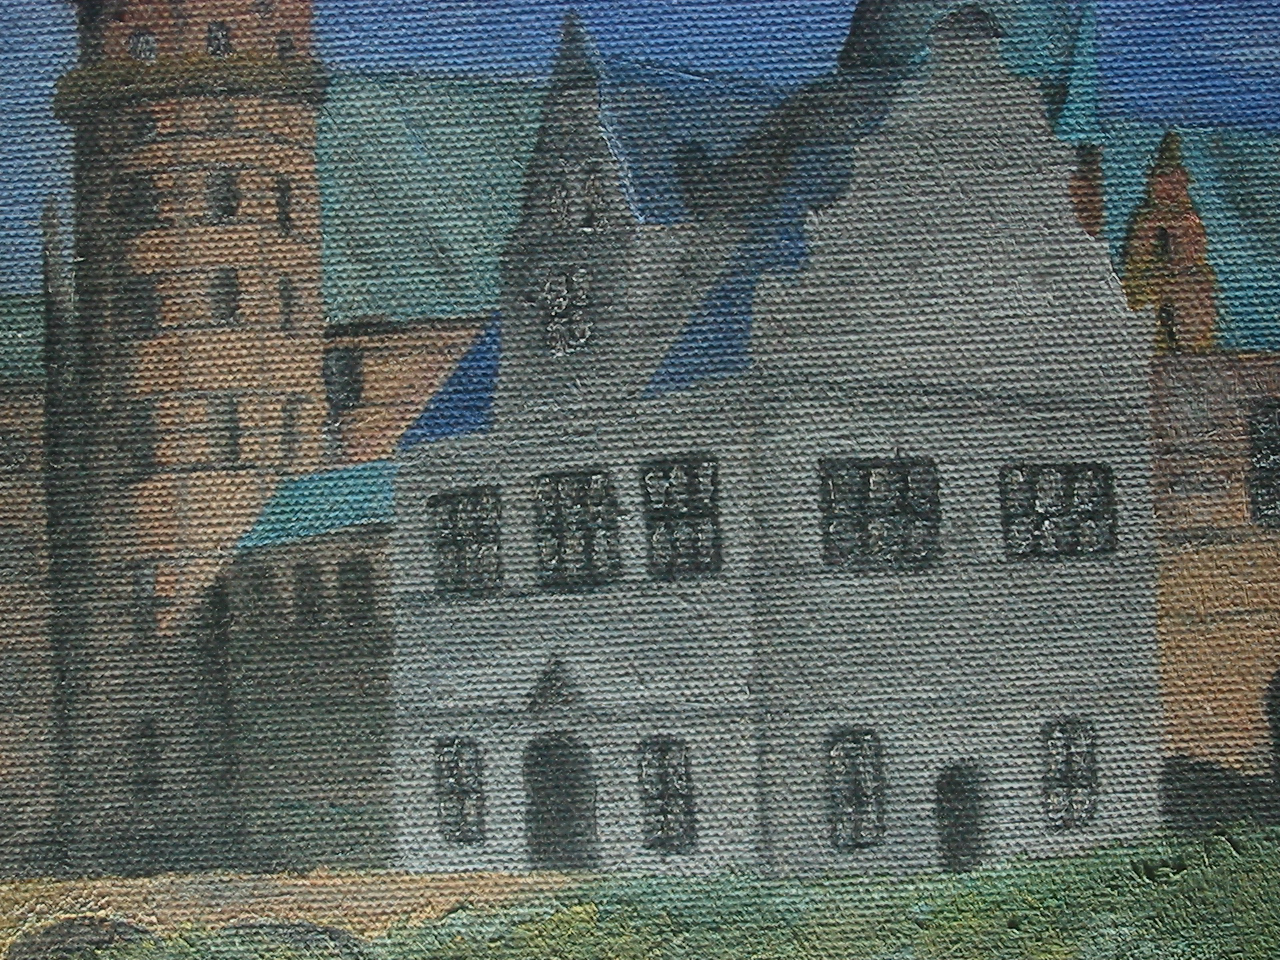

In [7]:
# Opening and converting the image to grayscale
img = Image.open('185-8526_IMG.JPG') 
Img_gray = Image.open('185-8526_IMG.JPG').convert('L')
img

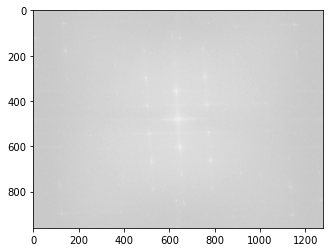

In [17]:
# Subtracting the mean from the image
mean_subtracted = np.array(Img_gray) - np.mean(np.array(Img_gray))

# Taking the FFT of the mean-subtracted image and shift the zero frequency component to the center
ft = fftshift(fft2(mean_subtracted))

# Plotting the FT
plt.imshow(np.log(abs(ft)), cmap='gray')
plt.show()


In [9]:
ft.mean()

(33.209803059895826-3.671137468093851e-15j)

/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_44091/3624268406.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  r_filtered = Image.fromarray(np.fft.ifft2(f_r_filtered).astype('uint8'))
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_44091/3624268406.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  g_filtered = Image.fromarray(np.fft.ifft2(f_g_filtered).astype('uint8'))
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_44091/3624268406.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  b_filtered = Image.fromarray(np.fft.ifft2(f_b_filtered).astype('uint8'))


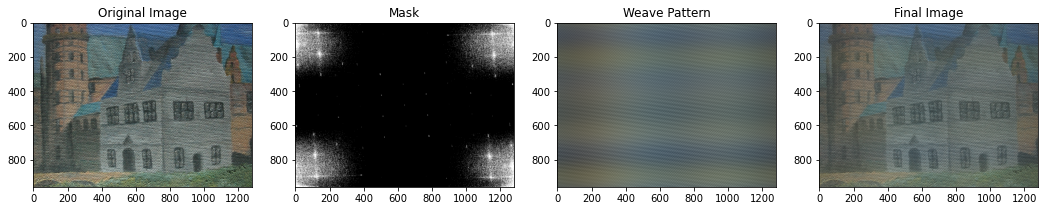

In [54]:
# Split the image into RGB channels
b, g, r = img.split()

# Shift the zero frequency component of the FT of each channel
fshift_r = np.fft.fftshift(np.fft.fft2(r))
fshift_g = np.fft.fftshift(np.fft.fft2(g))
fshift_b = np.fft.fftshift(np.fft.fft2(b))

# Threshold to obtain a binary mask
threshold = 40000
mask = np.where(np.abs(ft).real > threshold, 1, 0)
mask_shifted = np.fft.ifftshift(mask)

# Take the inverse Fourier Transform of each filtered channel
f_r_filtered = np.fft.ifftshift(fshift_r * mask_shifted)
f_g_filtered = np.fft.ifftshift(fshift_g * mask_shifted)
f_b_filtered = np.fft.ifftshift(fshift_b * mask_shifted)
r_filtered = Image.fromarray(np.fft.ifft2(f_r_filtered).astype('uint8'))
g_filtered = Image.fromarray(np.fft.ifft2(f_g_filtered).astype('uint8'))
b_filtered = Image.fromarray(np.fft.ifft2(f_b_filtered).astype('uint8'))

# Combine the filtered channels into a single image
weave_pattern = Image.merge('RGB', (b_filtered, g_filtered, r_filtered))

# Resize the filtered image to match the size of the original image
weave_pattern = weave_pattern.resize(img.size)

# Overlay the filtered image onto the original image
final_img = Image.blend(img, weave_pattern, 0.5)

# Display the images side by side
fig, axs = plt.subplots(1, 4, figsize=(18, 12))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('on')
axs[1].imshow(mask_shifted, cmap='gray')
axs[1].set_title('Mask')
axs[1].axis('on')
axs[2].imshow(weave_pattern, cmap='gray')
axs[2].set_title('Weave Pattern')
axs[2].axis('on')
axs[3].imshow(final_img, cmap='gray')
axs[3].set_title('Final Image')
axs[3].axis('on')
plt.show()

**Activity 2.2.3. Convolution Theorem Redux**

1. Create a binary image of two dots (one pixel each) along the x-axis symmetric about center. Take the FT and display the modulus.
2. Replace the dots with circles of some radius. Discuss what you observe in the FT modulus as you vary the radius.
3. Replace the dots with squares of some width. Discuss what you observe in the FT modulus as you vary the width.
4. Create a 200×200 array of zeros. Put 10 1's in random locations in the array. These ones will ap- proximate dirac deltas. Call this array A. Create an arbitrary 9×9 pattern, call it d. Convolve A and d. What do you observe?
5. Create another 200×200 array of zeros but this time put equally spaced 1's along the x- and y-axis in the array. Get the FT and display the modulus. Change the spacing the 1's and repeat. Explain what you observe.

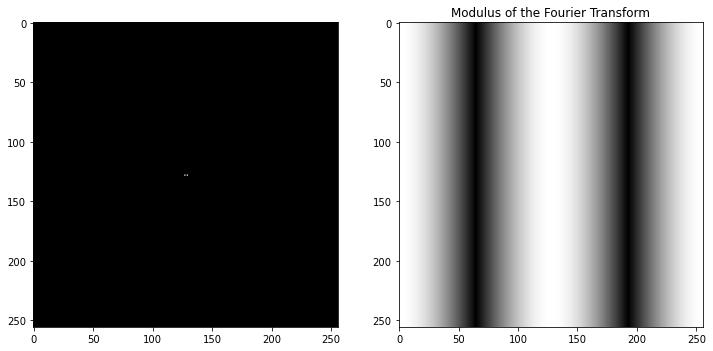

In [ ]:
# Create a 2D binary image of two dots (one pixel each) symmetric about center along the x-axis
image = np.zeros((256, 256), dtype=np.uint8)
image[128, 127] = 1
image[128, 129] = 1

# Take the Fourier transform (FT) of the image
ft = np.fft.fft2(image)

# Shift the zero-frequency component to the center of the spectrum
ft = np.fft.fftshift(ft)

# Compute the modulus of the FT
modulus = np.abs(ft)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(modulus, cmap='gray')
plt.title('Modulus of the Fourier Transform')
plt.show()

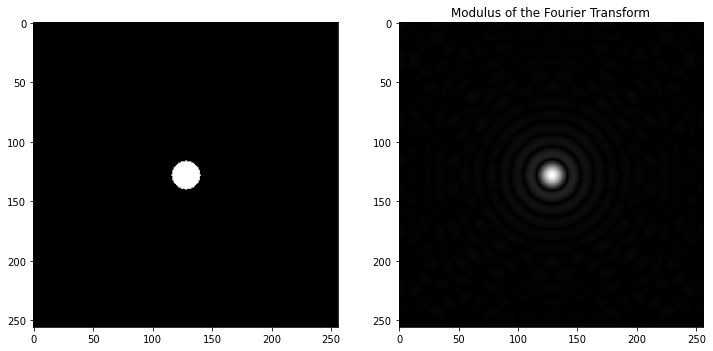

In [ ]:
# Create a 2D binary image of two circles of radius r symmetric about center along the x-axis
size = 256
center = size // 2
radius = size // 20
image = np.zeros((size, size))
y, x = np.ogrid[:size, :size]
dist = np.sqrt((x - center)**2 + (y - center)**2)
image[dist <= radius] = 1

# Take the Fourier transform (FT) of the image
ft = np.fft.fft2(image)

# Shift the zero-frequency component to the center of the spectrum
ft = np.fft.fftshift(ft)

# Compute the modulus of the FT
modulus = np.abs(ft)

# Display the modulus using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(modulus, cmap='gray')
plt.title('Modulus of the Fourier Transform')
plt.show()


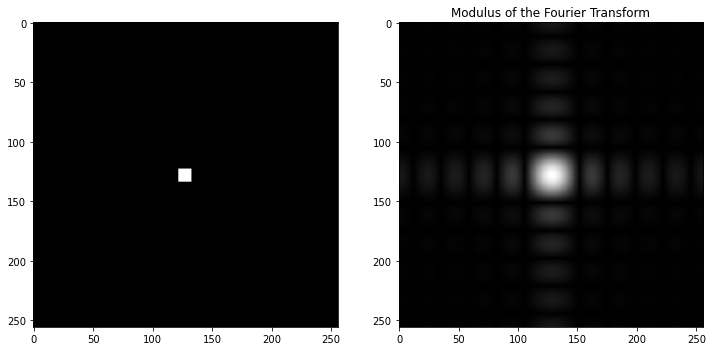

In [ ]:
# Create a 2D binary image of two squares of width w symmetric about center along the x-axis
w = 5 # width of the squares
image = np.zeros((256, 256), dtype=np.uint8)
image[128-w:128+w+1, 127-w:127+w+1] = 1
image[128-w:128+w+1, 127-w:127+w+1] = 1

# Take the Fourier transform (FT) of the image
ft = np.fft.fft2(image)

# Shift the zero-frequency component to the center of the spectrum
ft = np.fft.fftshift(ft)

# Compute the modulus of the FT
modulus = np.abs(ft)

# Display the modulus using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(modulus, cmap='gray')
plt.title('Modulus of the Fourier Transform')
plt.show()


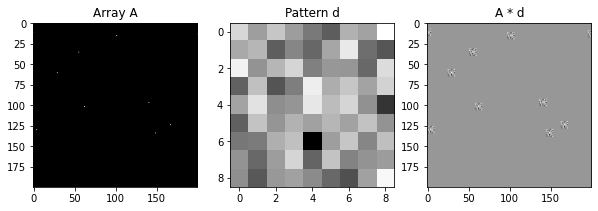

In [ ]:
# Create a 200x200 array of zeros
A = np.zeros((200, 200))

# Generate 10 random indices
indices = np.random.randint(0, 200, (10, 2))

# Place ones at the generated indices
for i, j in indices:
    A[i, j] = 1

# Create an arbitrary 9x9 pattern
d = np.random.randn(9, 9)

# Convolve A and d using 'same' boundary conditions
result = convolve2d(A, d, mode='same', boundary='fill', fillvalue=0)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Array A')

axs[1].imshow(d, cmap='gray')
axs[1].set_title('Pattern d')

axs[2].imshow(result, cmap='gray')
axs[2].set_title('A * d')

plt.show()


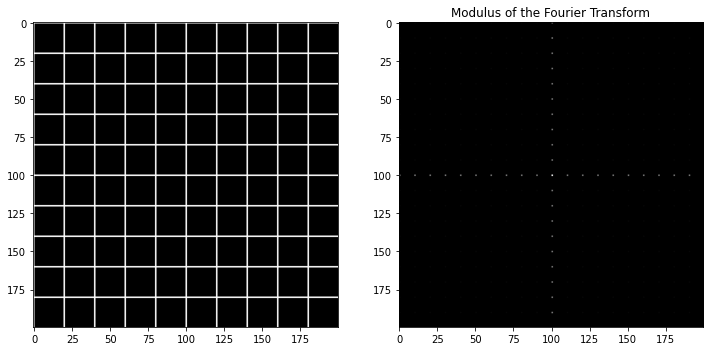

In [ ]:
# Create a 200x200 array of zeros
image = np.zeros((200, 200))

# Put equally spaced ones along the x- and y-axis
image[::20, :] = 1
image[:, ::20] = 1

# Take the Fourier transform (FT) of the image
ft = np.fft.fft2(image)

# Shift the zero-frequency component to the center of the spectrum
ft = np.fft.fftshift(ft)

# Compute the modulus of the FT
modulus = np.abs(ft)

# Display the modulus using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(modulus, cmap='gray')
plt.title('Modulus of the Fourier Transform')
plt.show()


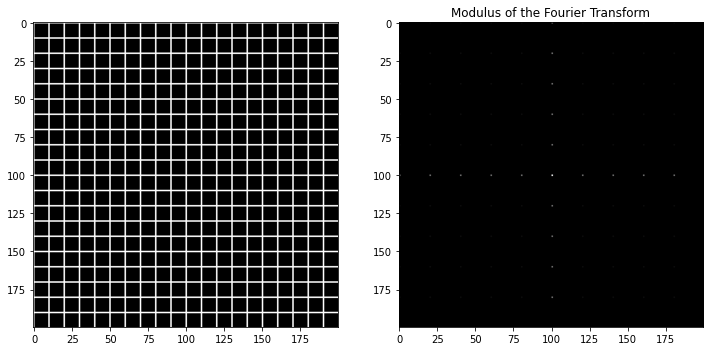

In [ ]:
# Create a 200x200 array of zeros
image = np.zeros((200, 200))

# Put equally spaced ones along the x- and y-axis
image[::10, :] = 1
image[:, ::10] = 1

# Take the Fourier transform (FT) of the image
ft = np.fft.fft2(image)

# Shift the zero-frequency component to the center of the spectrum
ft = np.fft.fftshift(ft)

# Compute the modulus of the FT
modulus = np.abs(ft)

# Display the modulus using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(modulus, cmap='gray')
plt.title('Modulus of the Fourier Transform')
plt.show()


**Activity 2.2.4 Fingerprints : Ridge Enhancement**

1. Prepare an image of your own fingerprint in grayscale. You may do this by taking a picture of your stamped-ink fingerprint on paper. If you fail to prepare your own fingerprint, download grayscale images from the web. Make sure the image is NOT YET BINARIZED like the figure below. Remember to cite your sources, like Examples of different classes of fingerprints. (a) right loop (b) whorl... | Download Scientific Diagram (researchgate.net).
2. Open ithe image as grayscale and mean-center the grayvalues of the image.
3. Obtain the FT of the mean-centered grayscale image and investigate where the frequencies of the fingerprint ridges lie. Tip: The modulus of the FT image might span several orders of magnitude sp use the log scale to display the FT image.
4. Explain why the FT of fingerprints look the way they do.

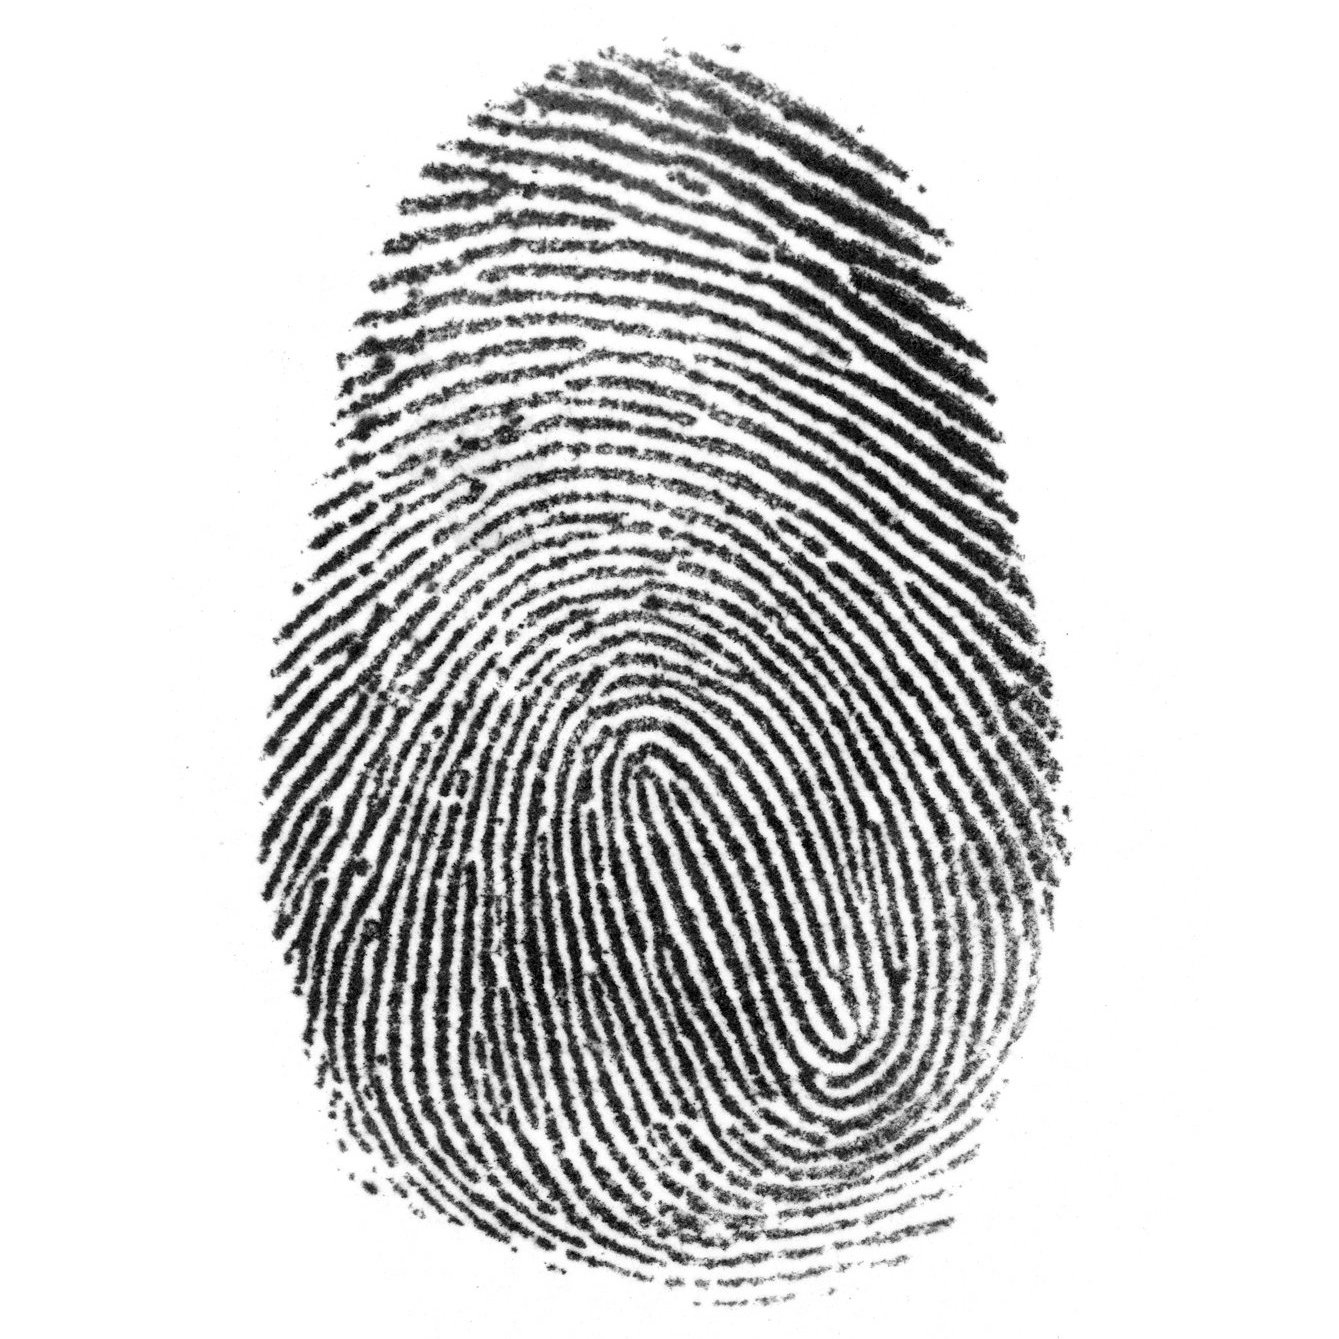

In [ ]:
# Opening and converting the image to grayscale
fingerprint = Image.open('fingerprint.jpg').convert('L')
img_array = np.array(fingerprint)
fingerprint

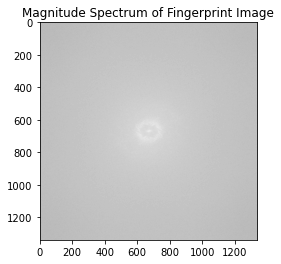

In [ ]:
# Mean-center the image
img_mean_centered = img_array - np.mean(img_array)

# Compute the 2D Fast Fourier Transform
ft = np.fft.fft2(img_mean_centered)

# Shift the zero-frequency component to the center of the spectrum
ft_shifted = np.fft.fftshift(ft)

# Compute the magnitude spectrum (absolute values) of the shifted FT
magnitude_spectrum = np.abs(ft_shifted)

# Display the magnitude spectrum using a log scale
plt.imshow(np.log(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum of Fingerprint Image')
plt.show()

**Activity 2.2.5 Lunar Landing Scanned Pictures : Line removal**

1. Download the image below from the website: 5. Apollo 11 site: High resolution vertical view (usra.edu)
2. Remove the vertical lines in the image by filtering in the Fourier Domain.

In [ ]:
# Opening and converting the image to grayscale
image = Image.open('ApolloLand05.tif').convert('L')
moon_array = np.array(moon)
moon

NameError: name 'moon' is not defined

In [ ]:
import numpy as np
from scipy.ndimage import convolve1d
from scipy.signal import firwin, welch

def remove_lines(image, distortion_freq=None, num_taps=65, eps=0.025):
  image = np.asarray(image, float)
  if distortion_freq is None:
    distortion_freq = estimate_distortion_freq(image)

  hpf = firwin(num_taps, distortion_freq - eps,
               pass_zero='highpass', fs=1)
  lpf = firwin(num_taps, eps, pass_zero='lowpass', fs=1)
  return image - convolve1d(convolve1d(image, hpf, axis=0), lpf, axis=1)

def estimate_distortion_freq(image, min_frequency=1/25):
  f, pxx = welch(np.reshape(image, (len(image), -1), 'C').sum(axis=1))
  pxx[f < min_frequency] = 0.0
  return f[pxx.argmax()]

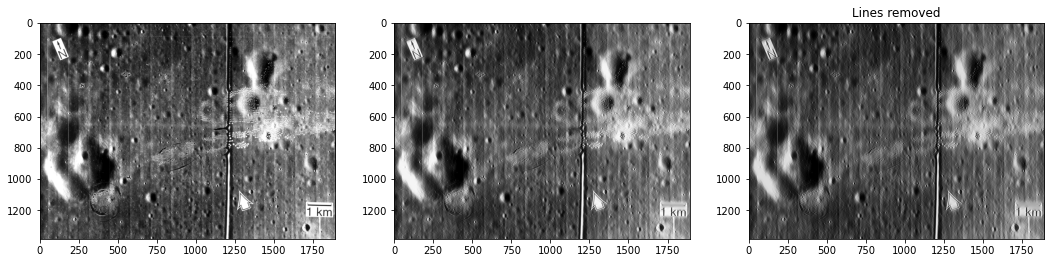

In [ ]:
removed1 = Image.fromarray(remove_lines(image))
removed2 = Image.fromarray(remove_lines(removed1))
# Display the modulus using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(removed1, cmap='gray')
axs[2].imshow(removed2, cmap='gray')
plt.title('Lines removed')
plt.show()

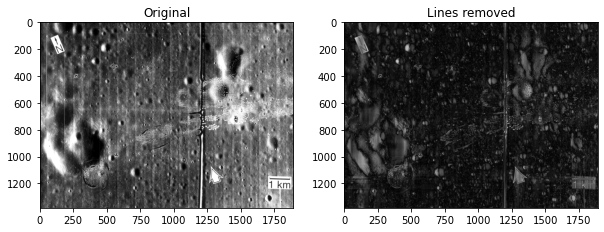

In [ ]:
# Compute the Fourier transform of the image
f = np.fft.fft2(moon_array)

# Shift the zero-frequency component to the center of the spectrum
fshift = np.fft.fftshift(f)

# Compute the magnitude spectrum of the Fourier transform
magnitude_spectrum = np.log(np.abs(fshift))

# Create a mask to remove horizontal and vertical lines
rows, cols = moon_array.shape
crow, ccol = rows//2, cols//2
mask = np.ones((rows, cols), np.uint8)
mask[crow-2:crow+2, :] = 0
mask[:, ccol-2:ccol+2] = 0

# Apply the mask to the Fourier transform
fshift_masked = fshift * mask

# Shift the zero-frequency component back to the top-left corner of the spectrum
f_ishift = np.fft.ifftshift(fshift_masked)

# Compute the inverse Fourier transform of the masked spectrum
img_lines_removed = np.fft.ifft2(f_ishift)
img_lines_removed = np.abs(img_lines_removed)

# Convert the image back to PIL Image object
img_lines_removed = Image.fromarray(img_lines_removed.astype(np.uint8))

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(moon, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_lines_removed, cmap='gray')
axs[1].set_title('Lines removed')

plt.show()
